## K-Means

El algoritmo de clustering (agrupamiento) denominado **K-means** corresponde al tipo de aprendizaje no supervisado, que se utiliza cuando tenemos datos no etiquetados (es decir, datos sin categorías o grupos definidos). El objetivo de este algoritmo es buscar agrupamientos en los datos, siendo **k** el número predefinido de grupos buscados. El algoritmo funciona iterativamente asignando cada muestra o punto del conjunto a uno de los K grupos. Las muestras se agrupan según la similitud de sus características. Los resultados del algoritmo de agrupamiento K-means son:

1. Los centroides de los clusters K, que se pueden usar para etiquetar nuevos datos

2. Etiquetas para los datos de entrenamiento (cada muestra se asigna a un solo grupo)

### Algoritmo

El algoritmo de agrupación de Κ-means utiliza un refinamiento iterativo para producir el resultado final. Las entradas del algoritmo corresponde al número de clústeres **K** junto con el conjunto de datos. El conjunto de datos es una colección de características de cada muestra. El algoritmo comienza con estimaciones iniciales para los Κ centroides, que pueden ser generados aleatoriamente o seleccionados aleatoriamente a partir del conjunto de datos. Una vez hecha la inicialización, el algoritmo itera entre estos dos pasos:

#### Paso de asignación de datos:

Cada centroide define uno de los clusters. En este paso, cada muestra se asigna a su centroide más cercano, en función de la distancia euclídea. Más formalmente, si $c_i$ es la colección de centroides del conjunto C, entonces cada muesta $x$ se asigna a un clúster mediante la siguiente expresión:

$$ \underset {c_i \in C} {\arg \min} \; dist (c_i, x)^2 $$

donde $dist(·)$ es la distancia euclídea estándar (L2).

#### Paso de actualización del centroide:

En este paso, los centroides se vuelven a calcular. Esto se hace tomando la media de todas las muestras asignadas al clúster de ese centroide.

$$ c_i = \frac{1}{| S_i |} \sum_ {x_i \in S_i x_i} $$

El algoritmo itera entre los pasos uno y dos hasta que se cumple algún criterio de detención (es decir, ninguna muestra cambia de clúster, la suma de las distancias se reduce al mínimo o se alcanza un número máximo de iteraciones).

Se garantiza que este algoritmo converge a un resultado. Sin embargo, el resultado puede ser un óptimo local (es decir, no necesariamente el mejor resultado posible), lo que significa que la evaluación de más de una ejecución del algoritmo con centroides iniciales aleatorios puede proporcionar un mejor resultado.

In [93]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd


data = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

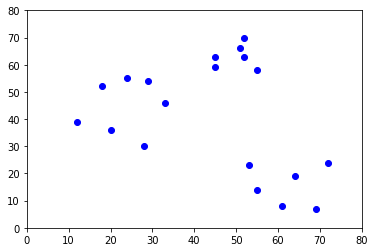

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['x'], data['y'], c="b")
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [113]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data)

print(kmeans.labels_)

print("Predicción:")
print(kmeans.predict([[0, 0], [4, 4]]))

cluster_centers = kmeans.cluster_centers_

[3 3 3 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1]
Predicción:
[3 3]


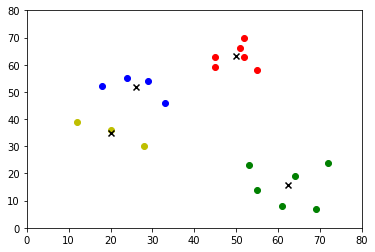

In [114]:
cx, cy = cluster_centers.T

colmap = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
for i, j, k in zip(data['x'], data['y'], kmeans.labels_):
    plt.scatter(i, j, color=colmap[k])

plt.scatter(cx, cy, c="k", marker='x')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()